In [1]:
#Importing major libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

<H2>Data Preparation</H2>

In [2]:
#Weather Data
temp = pd.read_csv('Temperature.csv')
rain = pd.read_csv('Rain.csv')
humidity = pd.read_csv('RH.csv')
wind = pd.read_csv('Wind.csv')

In [3]:
Weather = temp
Weather['Humidity'] = humidity['Manual Relative Humidity(Avg)']
Weather['Precipitation'] = rain['Precipitation']
Weather['Wind Speed'] = wind['Wind Speed(knot)(Avg)']
Weather['Wind Direction'] = wind['Wind Direction(Avg)']

In [4]:
Weather.head()

,Date,Max Temp,Min Temp,Humidity,Precipitation,Wind Speed,Wind Direction
0,1/1/2019,19.2,1.2,70.822,0.0,1.857,82.857
1,1/2/2019,17.9,1.4,72.613,0.0,2.000,82.500
2,1/3/2019,17.8,1.0,75.578,0.0,2.625,86.250
3,1/4/2019,17.0,1.5,76.465,0.0,2.625,60.000
4,1/5/2019,17.0,1.5,76.913,0.0,0.750,42.500


In [5]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1214 non-null   object 
 1   Max Temp        1214 non-null   float64
 2   Min Temp        1214 non-null   float64
 3   Humidity        1214 non-null   float64
 4   Precipitation   1214 non-null   float64
 5   Wind Speed      1214 non-null   float64
 6   Wind Direction  1214 non-null   float64
dtypes: float64(6), object(1)
memory usage: 66.5+ KB


In [6]:
Weather.isnull().sum()

Date              0
Max Temp          0
Min Temp          0
Humidity          0
Precipitation     0
Wind Speed        0
Wind Direction    0
dtype: int64

In [7]:
Weather['Date']=pd.to_datetime(Weather['Date'])
Weather['Date']=Weather['Date'].apply(lambda x:x.date())
Weather['Year']=Weather['Date'].apply(lambda x:x.year)
Weather['Month']=Weather['Date'].apply(lambda x:x.month)
Weather['Day']=Weather['Date'].apply(lambda x:x.day)

In [8]:
Weather.head()

,Date,Max Temp,Min Temp,Humidity,Precipitation,Wind Speed,Wind Direction,Year,Month,Day
0,2019-01-01,19.2,1.2,70.822,0.0,1.857,82.857,2019,1,1
1,2019-01-02,17.9,1.4,72.613,0.0,2.000,82.500,2019,1,2
2,2019-01-03,17.8,1.0,75.578,0.0,2.625,86.250,2019,1,3
3,2019-01-04,17.0,1.5,76.465,0.0,2.625,60.000,2019,1,4
4,2019-01-05,17.0,1.5,76.913,0.0,0.750,42.500,2019,1,5


In [11]:
#Peak Demand Data and to forecast parameters data
demand = pd.read_csv('Daily Peak Demand.csv')
forecast = pd.read_csv('seven days1.csv')

In [12]:
data = Weather.drop('Date', axis=1)
data['Peak Demand(MW)'] = demand['Peak Load (MW)']
data.head()

,Max Temp,Min Temp,Humidity,Precipitation,Wind Speed,Wind Direction,Year,Month,Day,Peak Demand(MW)
0,19.2,1.2,70.822,0.0,1.857,82.857,2019,1,1,372.47
1,17.9,1.4,72.613,0.0,2.000,82.500,2019,1,2,382.08
2,17.8,1.0,75.578,0.0,2.625,86.250,2019,1,3,403.26
3,17.0,1.5,76.465,0.0,2.625,60.000,2019,1,4,376.04
4,17.0,1.5,76.913,0.0,0.750,42.500,2019,1,5,396.01


In [13]:
forecast.head()

,Max Temp,Min Temp,Humidity,Precipitation,Wind Speed (Knot) Avg,Wind Direction Avg,Year,Month,Day
0,28.5,17.5,76.115,0.0,3.750,110.00,2022,4,29
1,23.0,16.0,84.952,2.0,3.125,188.75,2022,4,30
2,30.0,15.5,70.571,3.0,4.375,190.00,2022,5,1
3,28.6,17.5,85.973,0.9,4.375,130.00,2022,5,2
4,28.0,16.1,73.672,24.8,4.000,187.50,2022,5,3


C:\anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


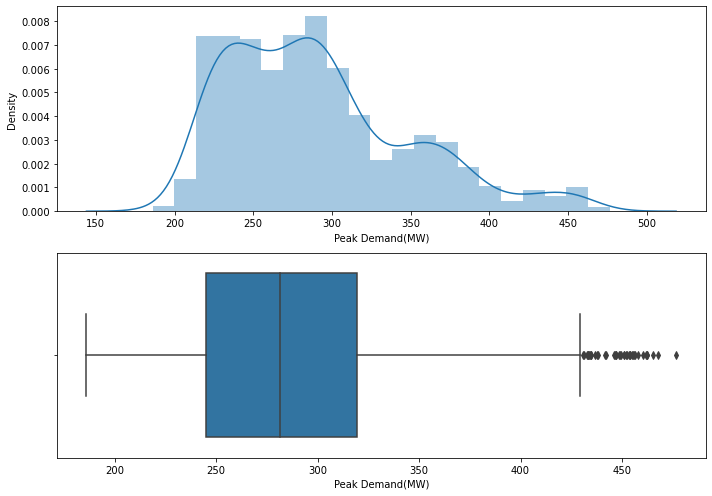

In [14]:
#visualizing Peak Demand
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['Peak Demand(MW)'])
fig.add_subplot(2,1,2)
sns.boxplot(data['Peak Demand(MW)'])
plt.tight_layout()

Text(0, 0.5, 'Demand (MW)')

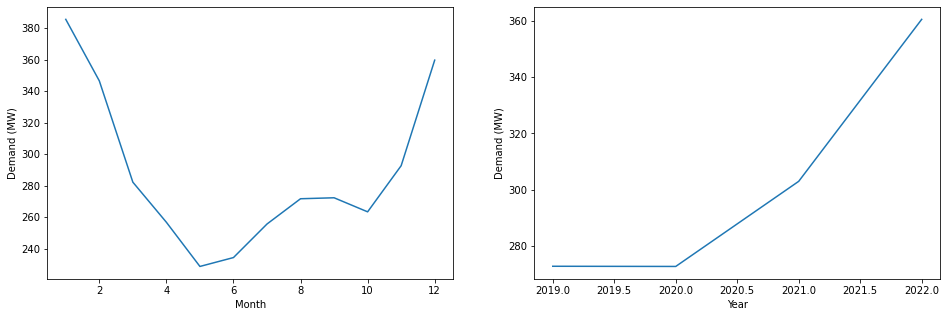

In [15]:
#data visualization Volume vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
data.groupby('Month').mean()['Peak Demand(MW)'].plot()
plt.ylabel('Demand (MW)')
fig.add_subplot(1,2,2)
data.groupby('Year').mean()['Peak Demand(MW)'].plot()
plt.ylabel('Demand (MW)')

In [16]:
data_1 = data[['Max Temp','Min Temp','Humidity','Precipitation','Wind Speed','Wind Direction','Peak Demand(MW)']]

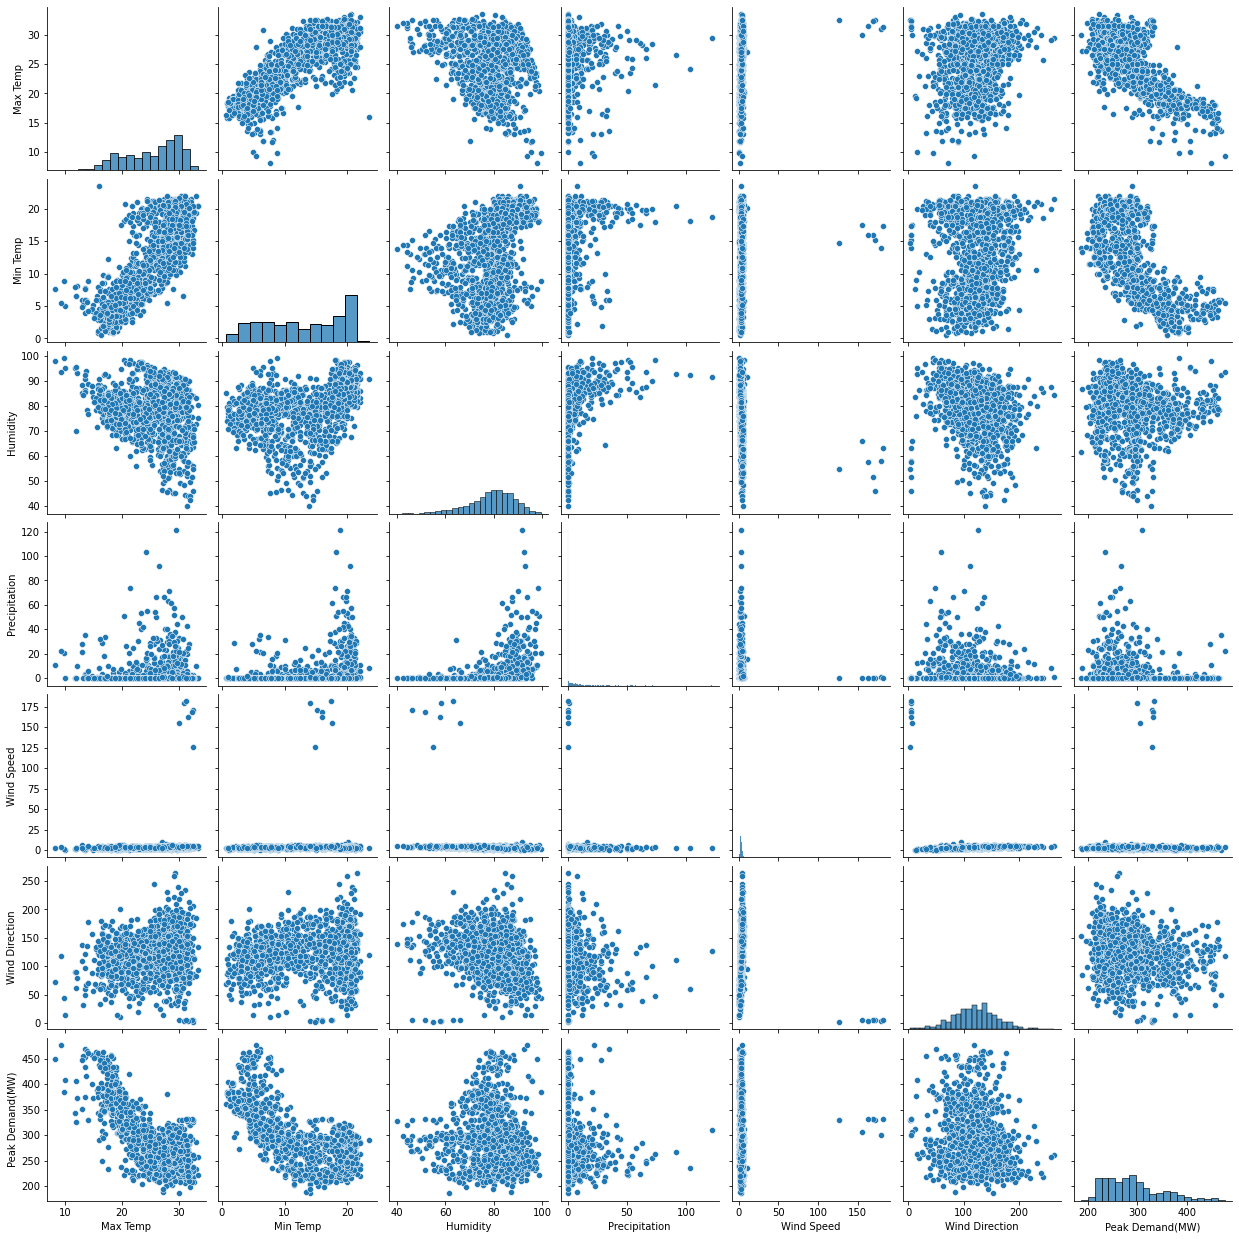

In [17]:
sns.pairplot(data= data_1, palette ='coolwarm')

<AxesSubplot:>

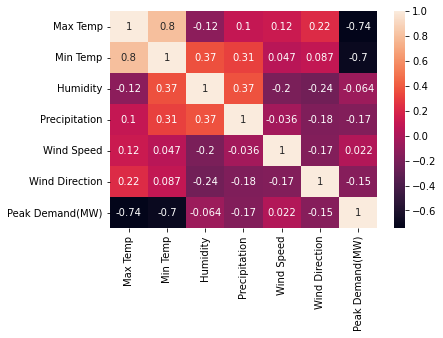

In [18]:
sns.heatmap(data_1.corr(), annot = True)

<H4>Dataset splitting and scaling</H4>

In [19]:
X = data.drop('Peak Demand(MW)',axis =1).values
y = data['Peak Demand(MW)'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1189, 9)
(25, 9)


In [21]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_25568/797503184.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_25568/797503184.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float)

<H1>Multiple Linear Regression </H1>

In [22]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

290.2160639192616
[-23.27961073 -21.88284119   5.35198     -2.04204649   3.00410806
  -2.48215548  20.43356297   1.24705389  -1.5568332 ]


In [24]:
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, data.drop('Peak Demand(MW)',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
Max Temp,-23.279611
Min Temp,-21.882841
Humidity,5.351980
Precipitation,-2.042046
Wind Speed,3.004108
Wind Direction,-2.482155
Year,20.433563
Month,1.247054
Day,-1.556833


In [25]:
#predicting the test set result
y_pred = regressor.predict(X_test)

In [26]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,450.93,392.449384
1,301.13,315.237295
2,267.63,263.839571
3,211.90,245.985881
4,237.58,257.358109


Text(0, 0.5, 'Peak Demand (MW)')

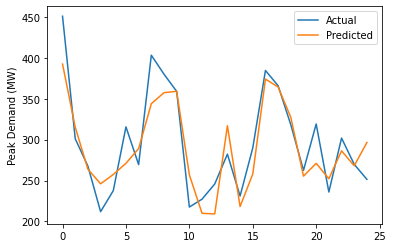

In [27]:
df1.plot()
plt.ylabel('Peak Demand (MW)')

MAE: 24.17577880941175
MSE: 891.0947607817645
RMSE: 29.85121037381507
MAPE: 8.381156217526053
VarScore: 78.06694429579018
R2_Score: 0.7726915981102185


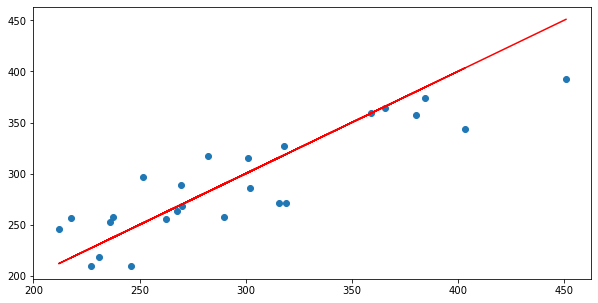

In [28]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE - MAPE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100)
print('VarScore:',metrics.explained_variance_score(y_test,y_pred)*100)
print('R2_Score:',metrics.r2_score(y_test,y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [29]:
# Forecasting one week demand(from 4/29/2022 to 5/5/2022)
X_forecast = s_scaler.transform(forecast.values.astype(np.float))
y_pred = regressor.predict(X_forecast)
df3 = pd.DataFrame({'Predicted': y_pred})
df3

C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_25568/3756661647.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_forecast = s_scaler.transform(forecast.values.astype(np.float))


,Predicted
0,293.820108
1,324.188474
2,290.493009
3,302.491528
4,295.078939
5,296.627367
6,296.519317


<H1>Neural Network Regression</H1>

In [30]:
# Neural Network Model with 
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss=tf.keras.losses.MeanSquaredError())

In [31]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=30,epochs=150)
model.summary()

Epoch 1/150
40/40 [==============================] - 2s 12ms/step - loss: 86857.9766 - val_loss: 90015.0000
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 85172.0312 - val_loss: 87328.7734
Epoch 3/150
40/40 [==============================] - 0s 3ms/step - loss: 81379.1641 - val_loss: 81499.5234
Epoch 4/150
40/40 [==============================] - 0s 3ms/step - loss: 74141.7656 - val_loss: 71052.7422
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 62627.0625 - val_loss: 56273.3281
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 47813.5625 - val_loss: 38577.0781
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 32167.6973 - val_loss: 23207.0977
Epoch 8/150
40/40 [==============================] - 0s 3ms/step - loss: 19333.0781 - val_loss: 12907.2852
Epoch 9/150
40/40 [==============================] - 0s 3ms/step - loss: 11059.9326 - val_loss: 7557.4639
Epoch 10/150
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 441.9554 - val_loss: 99.8477
Epoch 80/150
40/40 [==============================] - 0s 4ms/step - loss: 438.2505 - val_loss: 90.1321
Epoch 81/150
40/40 [==============================] - 0s 3ms/step - loss: 433.8922 - val_loss: 90.8818
Epoch 82/150
40/40 [==============================] - 0s 3ms/step - loss: 428.4700 - val_loss: 100.1131
Epoch 83/150
40/40 [==============================] - 0s 3ms/step - loss: 427.2233 - val_loss: 85.9309
Epoch 84/150
40/40 [==============================] - 0s 3ms/step - loss: 421.6883 - val_loss: 98.1480
Epoch 85/150
40/40 [==============================] - 0s 3ms/step - loss: 416.4384 - val_loss: 86.9136
Epoch 86/150
40/40 [==============================] - 0s 3ms/step - loss: 413.1599 - val_loss: 85.6490
Epoch 87/150
40/40 [==============================] - 0s 3ms/step - loss: 409.2785 - val_loss: 81.5063
Epoch 88/150
40/40 [==============================] - 0s 3ms/step - loss: 406.9549 - 

_________________________________________________________________


Text(0, 0.5, 'Error')

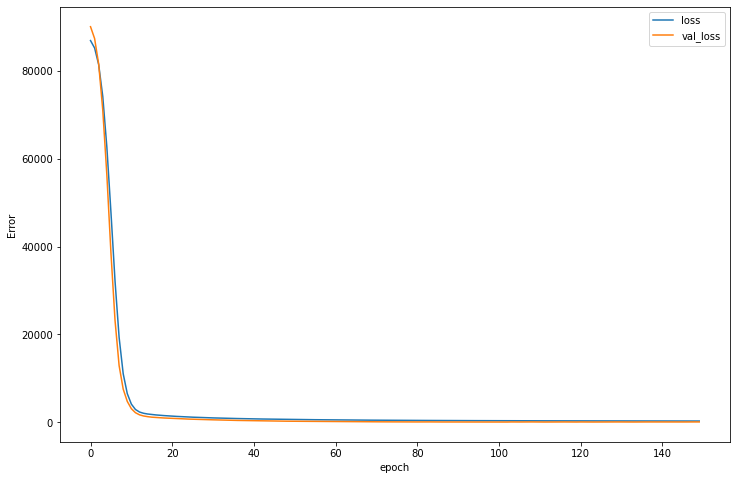

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))
plt.xlabel('epoch')
plt.ylabel('Error')

MAE: 6.905582543945312
MSE: 88.01578496280486
RMSE: 9.381672823265841
MAPE: 2.3143425989781607
VarScore: 98.07091017540183
R2_Score: 0.9775481482985965


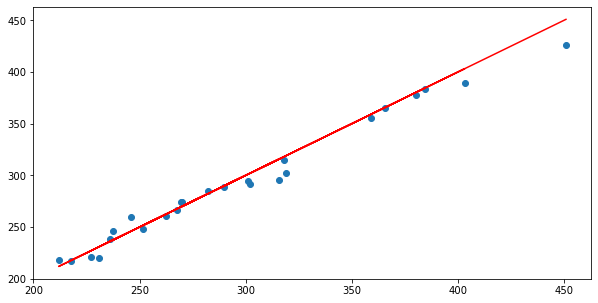

In [33]:
#Evaluation on test data
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100)
print('VarScore:',metrics.explained_variance_score(y_test,y_pred)*100)
print('R2_Score:',metrics.r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': np.squeeze(y_pred)})
df_2.head()

,Actual,Predicted
0,450.93,426.498718
1,301.13,294.244843
2,267.63,266.074860
3,211.90,217.770676
4,237.58,245.993362


Text(0, 0.5, 'Peak Demand (MW)')

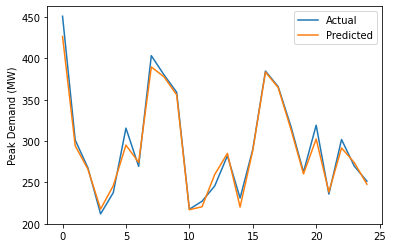

In [35]:
df_2.plot()
plt.ylabel('Peak Demand (MW)')

In [36]:
# Forecasting one week demand(from 4/29/2022 to 5/5/2022)
X_forecast = s_scaler.transform(forecast.values.astype(np.float))
y_pred = model.predict(X_forecast)
df3 = pd.DataFrame({'Predicted': np.squeeze(y_pred)})
df3

C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_25568/1713818383.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_forecast = s_scaler.transform(forecast.values.astype(np.float))


,Predicted
0,295.751740
1,325.285461
2,287.332397
3,288.416626
4,273.171692
5,285.270752
6,275.381470


In [60]:
weights = model.layers[2].get_weights()[0]
biases = model.layers[2].get_weights()[1]
weights.shape
print(weights)
#biases.shape
print(biases)

[[-0.6701579 ]
 [-1.0270991 ]
 [ 0.87263036]
 [-0.21592438]
 [ 0.96514195]
 [ 0.86717653]
 [ 0.78871185]
 [ 0.93060315]
 [ 0.65043104]
 [ 0.92905617]
 [-0.13409615]
 [ 0.8280143 ]
 [ 0.7283384 ]
 [ 0.78441834]
 [-1.0081713 ]
 [ 0.75555336]
 [ 0.77891374]
 [ 0.81561136]
 [ 0.6309918 ]
 [ 0.68553823]
 [ 0.8395218 ]
 [ 0.55197924]
 [ 0.7231369 ]
 [ 0.5559985 ]
 [ 0.7089512 ]
 [ 0.5935127 ]
 [ 0.79835474]
 [-1.8766768 ]
 [ 0.8716041 ]
 [ 0.65875214]
 [ 0.5826529 ]
 [ 0.5814401 ]
 [-0.18978153]
 [ 0.89399445]
 [ 0.75825787]
 [-1.5413408 ]
 [ 0.8051376 ]
 [-0.8135747 ]
 [ 0.6294345 ]
 [-0.1710644 ]]
[0.4053855]
